Working directory: c:\Users\EmDie\AppData\Local\Programs\Microsoft VS Code
Mean projection 3.663910999561817


Text(0.5, 1.0, '2D Mapka hviezdokopy')

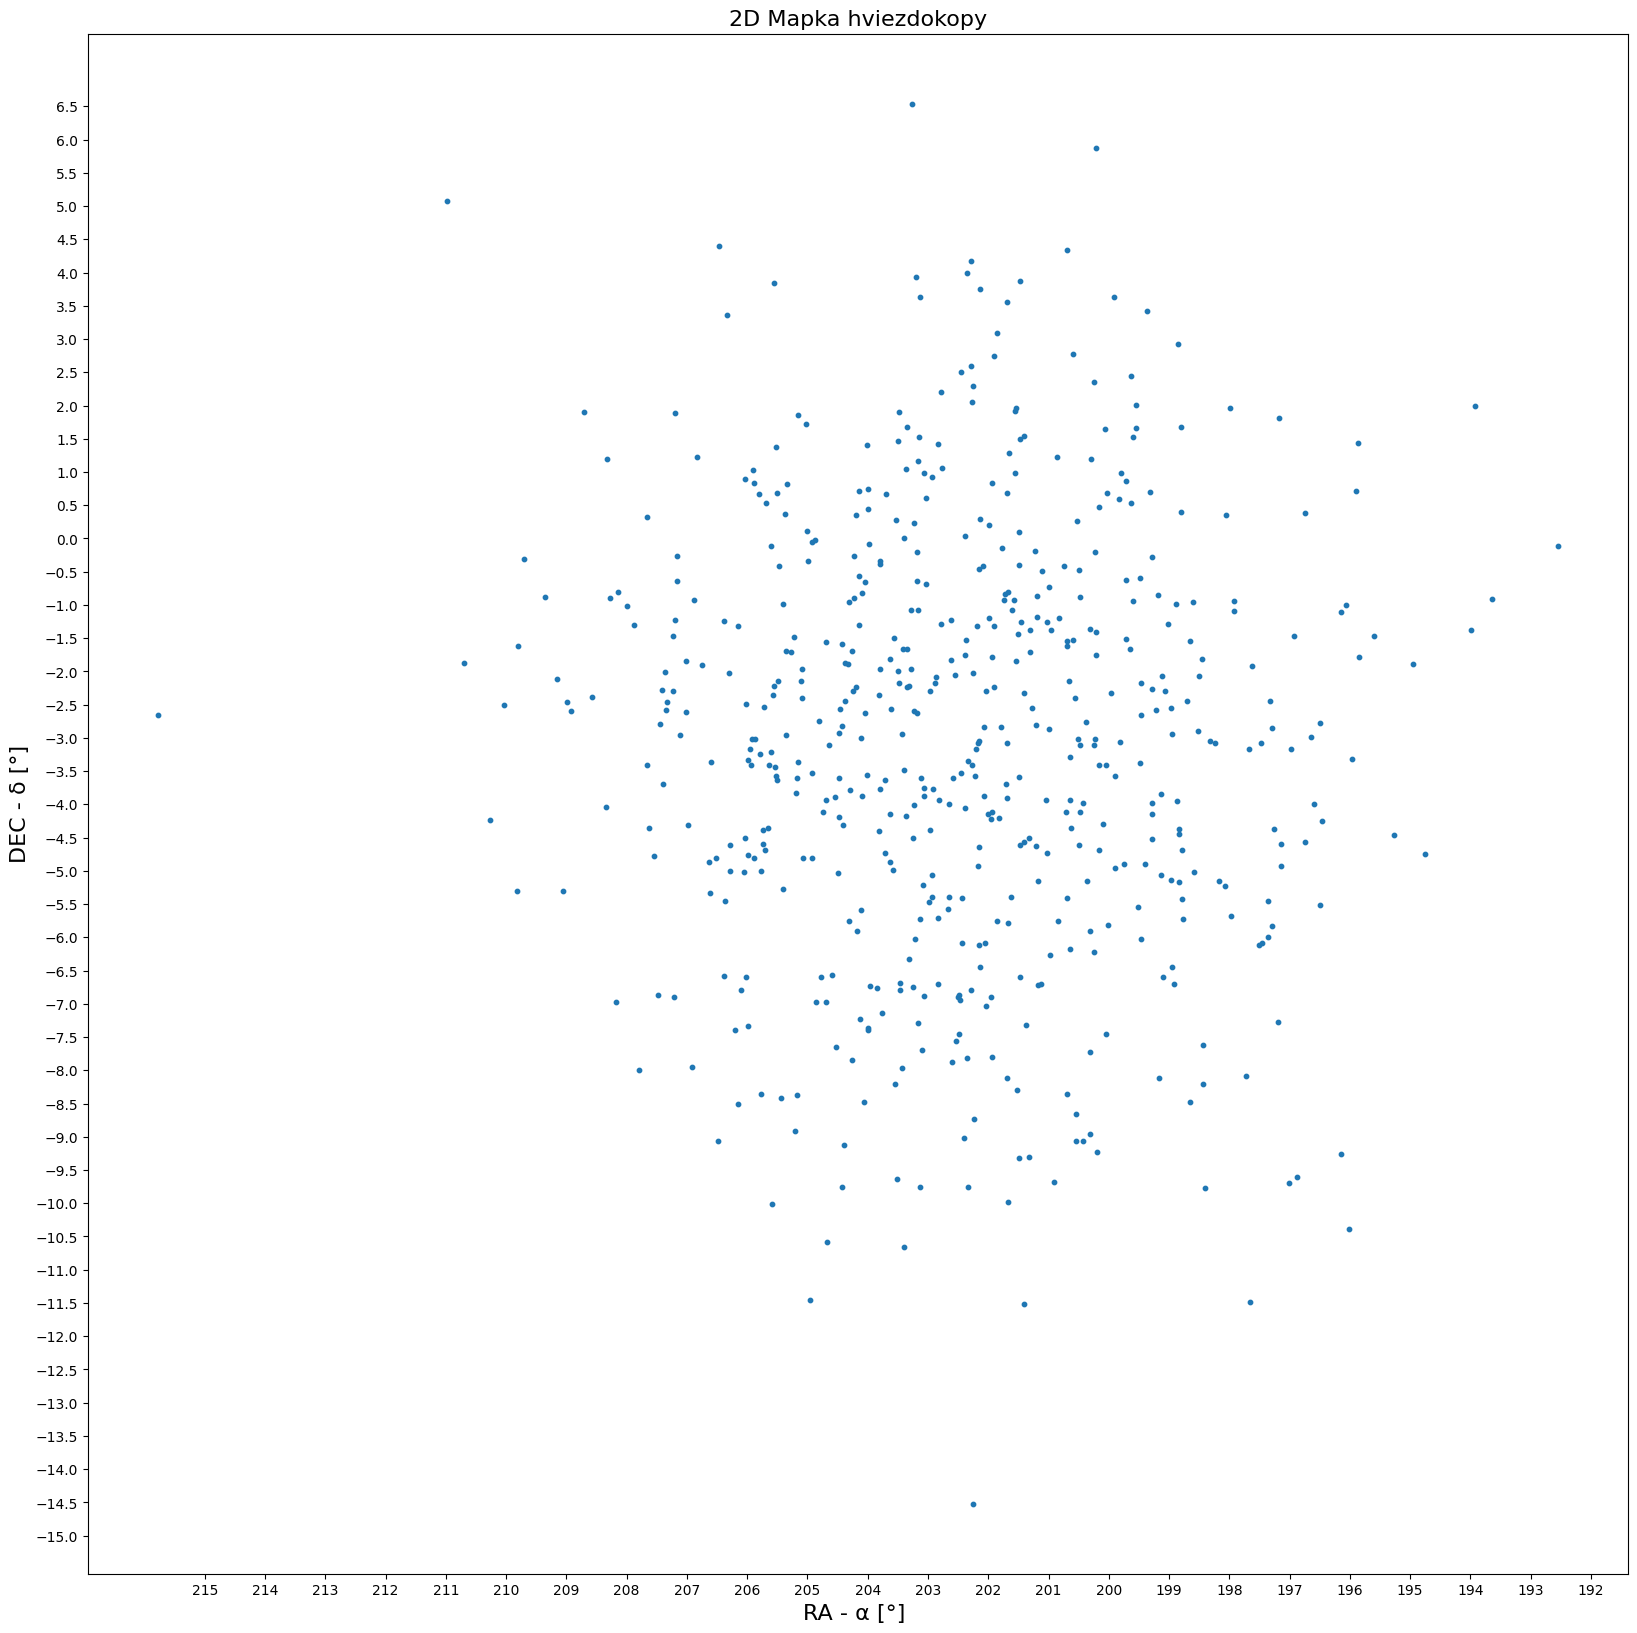

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

print("Working directory:", os.getcwd())

with open("C:/Users/EmDie/Desktop/praktika 5b/Cluster66.txt", "r") as filedata:
    all_data = [line.split() for line in filedata.readlines()]

all_data = all_data[1:]
soubor = np.array([list(map(float, row)) for row in all_data])

# Store the computed r values
r_values = []

for i in range(573):
    vx = soubor[i][6]
    vy = soubor[i][7]
    vz = soubor[i][8]
    x = soubor[i][3]
    y = soubor[i][4]
    z = soubor[i][5]
    v = np.array([vx, vy, vz])
    u = np.array([x, y, z])
    u2 = float(np.sqrt(np.pow(x,2) + np.pow(y,2) + np.pow(z,2)))
    z_array = np.array([x/u2, y/u2, z/u2])
    r = np.dot(v, z_array)  # dot product to get scalar result
    r_values.append(r)
    mean_r = np.dot(v, z_array)
    r_values.append(r)
mean_r= np.mean(r_values)
print("Mean projection", mean_r)
 

cluster = np.array(soubor,dtype=float)
DEC, RA = cluster.T[2], cluster.T[1]

plt.figure(figsize=(20,20))

plt.scatter(RA[::-1],DEC, s=10)

plt.xticks(np.arange(np.floor(np.min(RA[::-1])),np.ceil(np.max(RA[::-1])),1))
plt.yticks(np.arange(np.floor(np.min(DEC)),np.ceil(np.max(DEC)),0.5)) 

plt.gca().invert_xaxis()
plt.gca().set_aspect((np.max(RA[::-1]) - np.min(RA[::-1])) / (np.max(DEC) - np.min(DEC)))


plt.xlabel("RA - \u03B1 [°] ",fontsize=16)
plt.ylabel("DEC - \u03B4 [°]", fontsize=16)
plt.title("2D Mapka hviezdokopy", fontsize=16)